<a href="https://colab.research.google.com/github/SajjadMustafa10/DeepLearning/blob/main/mnist_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [3]:
mnist_Dataset = tf.keras.datasets.mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = mnist_Dataset.load_data()  # split into tetsing and training

In [ ]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]  # let's have a look at one pixel

0

In [5]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

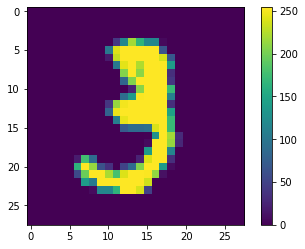

In [8]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2642 - accuracy: 0.9247
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1209 - accuracy: 0.9645
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0832 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0624 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0484 - accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0374 - accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0306 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0252 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0196 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.017

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9788
Test accuracy: 0.9787999987602234


In [14]:
predictions = model.predict(test_images)

In [17]:
predictions[15]

array([1.2932773e-13, 3.3360283e-09, 2.2762052e-10, 4.0647410e-05,
       3.3058647e-13, 9.9995923e-01, 6.4844005e-11, 3.4673447e-10,
       7.3368213e-08, 1.2269935e-10], dtype=float32)

In [18]:
np.argmax(predictions[15])

5

In [19]:
test_labels[15]

5

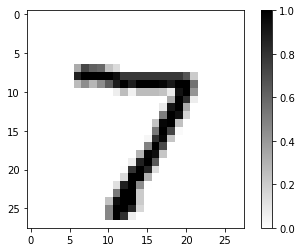

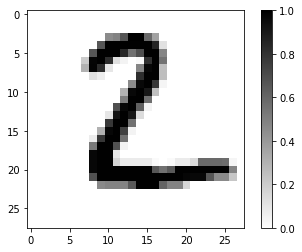

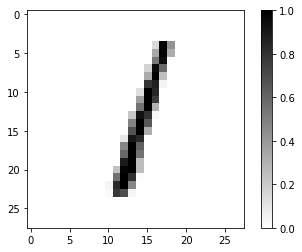

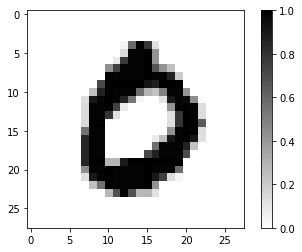

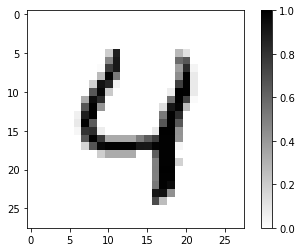

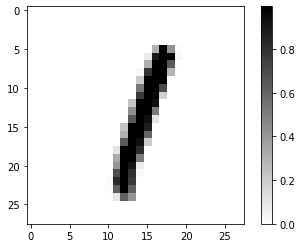

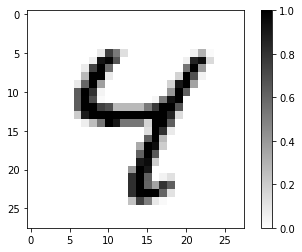

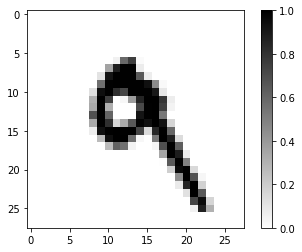

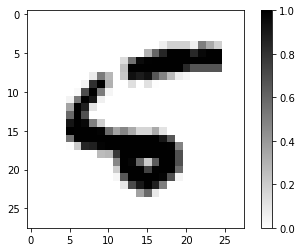

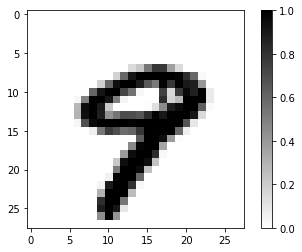

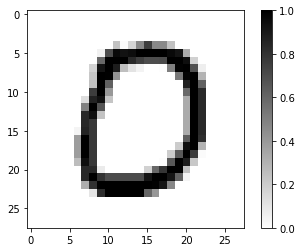

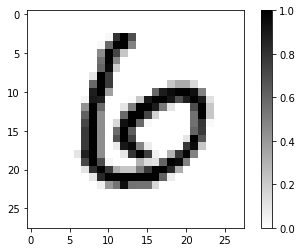

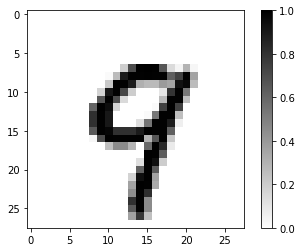

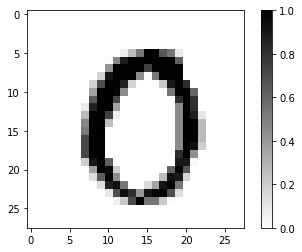

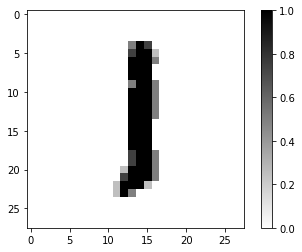

In [23]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image):
  prediction = model.predict(np.array([image]))
  show_image(image)


def show_image(img):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.show()

for i in range(15):
  image = test_images[i]
  predict(model, image)
